# **Etape 1 - Importation des librairies et chargement des fichiers**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [37]:
df = pd.read_csv('billets.csv', sep=';')

# **Etape 2 - Analyse exploratoire du fichier**

In [38]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df.shape[1]))

Le tableau comporte 1500 observation(s) ou article(s)
Le tableau comporte 7 colonne(s)


In [39]:
for i in df.columns:
    print ("---- %s ---" % i)
    print(df[i].value_counts())

---- is_genuine ---
True     1000
False     500
Name: is_genuine, dtype: int64
---- diagonal ---
171.99    28
171.91    26
171.94    25
171.95    24
172.02    24
          ..
172.60     1
171.28     1
172.54     1
171.25     1
171.16     1
Name: diagonal, Length: 159, dtype: int64
---- height_left ---
103.95    30
104.05    27
104.18    27
103.99    25
104.17    25
          ..
103.36     1
103.30     1
103.46     1
103.41     1
104.85     1
Name: height_left, Length: 155, dtype: int64
---- height_right ---
103.76    28
103.83    24
103.94    24
103.80    24
103.85    23
          ..
103.08     1
103.24     1
103.16     1
103.04     1
104.61     1
Name: height_right, Length: 170, dtype: int64
---- margin_low ---
4.08    20
4.10    20
4.18    20
4.17    18
4.12    18
        ..
5.35     1
6.11     1
5.70     1
5.74     1
5.41     1
Name: margin_low, Length: 285, dtype: int64
---- margin_up ---
3.08    35
3.12    33
3.14    30
2.99    28
3.07    27
        ..
3.74     1
2.64     1
2.61  

In [40]:
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [41]:
df = df.astype({'is_genuine':'str'})

In [42]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [43]:
df.corr()

<ipython-input-43-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


In [44]:
#on vérifie les lignes avec au moins une valeur nulle
#37 lignes (margin_low = NaN)
df[df.isnull().any(axis=1)]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [45]:
#Trois solutions pour les valeurs manquantes (on choisit la première car faible nombre de lignes)
#Ignorer et supprimer tous les échantillons pour lesquels cette valeur manque.
#Remplacer les valeurs manquantes par une valeur spécifique qui indique que la valeur n'est pas disponible.
#Inférer les valeurs manquantes à partir des valeurs disponibles, voire des autres variables.

#solution moyenne : df['margin_low'].fillna((df['margin_low'].mean()), inplace=True)
#solution de suppression des lignes avec 1 null : df.dropna(subset=['margin_low'], inplace=True)
#df = df.reset_index(drop=True)

In [46]:
#solution pour remplacer les Null par regression linéaire
#source = https://medium.com/@suyebaanjum98/mastering-null-value-handling-a-comprehensive-guide-to-replacing-missing-data-in-your-dataset-1a0bf711e531
#source = https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/
from sklearn.linear_model import LinearRegression

# Split the data into two sets: one with null values and one without
df_train = df.dropna(subset=['margin_low'])
df_predict = df[df['margin_low'].isnull()]

# Fit a model
model = LinearRegression()
model.fit(df_train[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']], df_train['margin_low'])

LinearRegression()

In [47]:
#calcul de R2
linear_r2 = model.score(df_train[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']], df_train['margin_low'])
print('R^2: {0}'.format(linear_r2))

R^2: 0.4773366973063957


Assumption 1: Linear Relationship between the Target and the Feature 

Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.


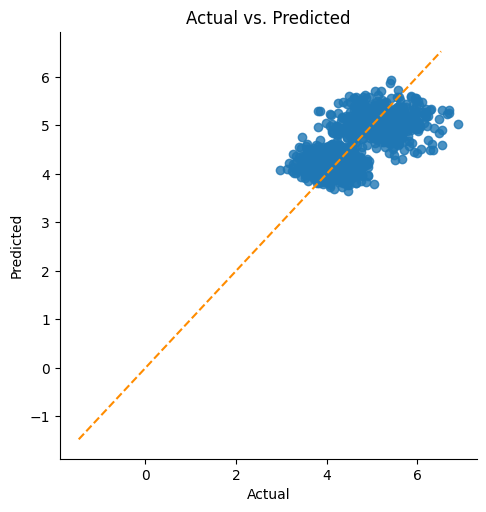

In [48]:
#vérification linearity
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

    return df_results

def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')

    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False)

    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

linear_assumption(model, df_train[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']], df_train['margin_low'])

Assumption 2: Homoscedasticity of Error Terms 

Residuals should have relative constant variance


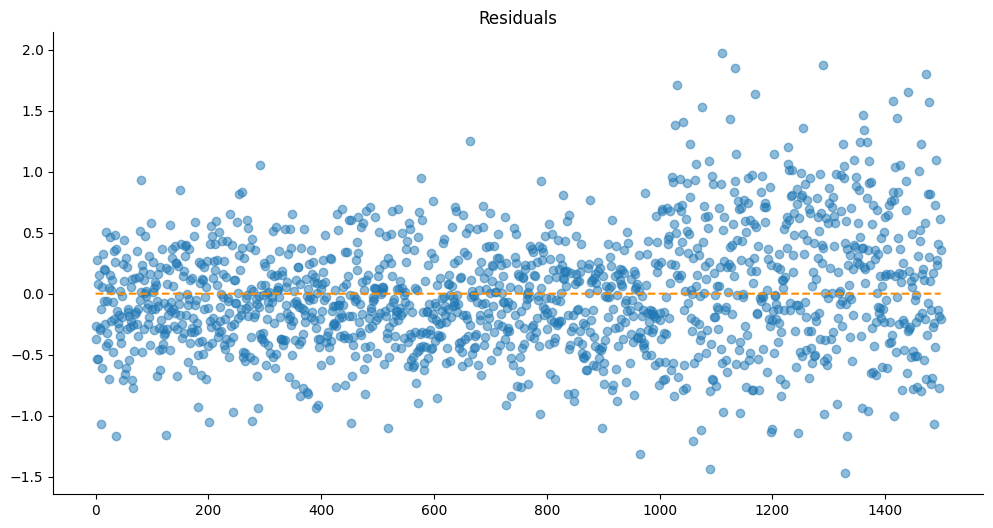

In [49]:
#vérification homoscedaticity
def homoscedasticity_assumption(model, features, label):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    print('Assumption 2: Homoscedasticity of Error Terms', '\n')

    print('Residuals should have relative constant variance')

    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(12, 6))
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show()
homoscedasticity_assumption(model, df_train[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']], df_train['margin_low'])

Assumption 3: The error terms are normally distributed 

Using the Anderson-Darling test for normal distribution
p-value from the test - below 0.05 generally means non-normal: 5.114137678791534e-12
Residuals are not normally distributed


<ipython-input-50-a0ca5f4afc8b>:30: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_results['Residuals'])


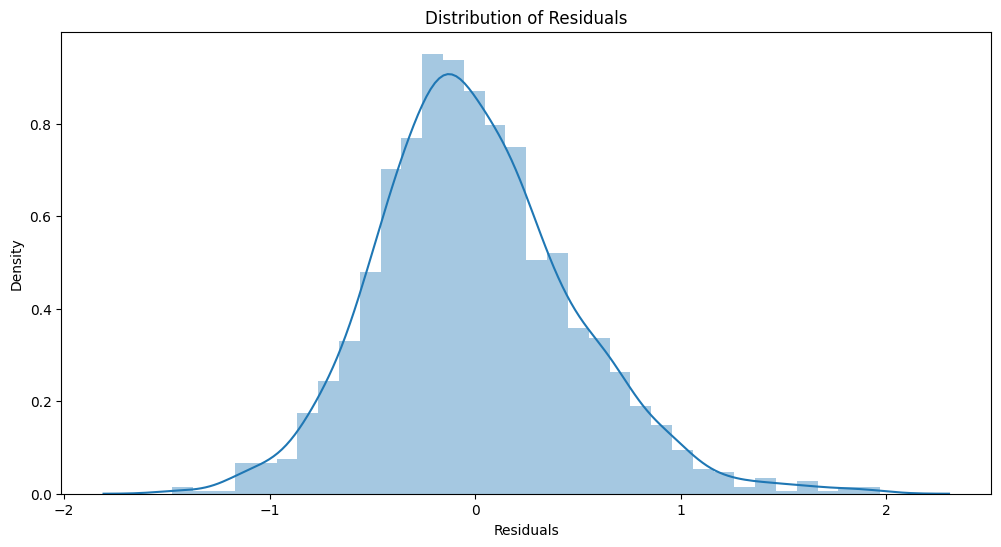


Assumption not satisfied

Confidence intervals will likely be affected
Try performing nonlinear transformations on variables


In [50]:
#vérification normalité de la distribution des résidus
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.

    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 3: The error terms are normally distributed', '\n')

    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)

    print('Using the Anderson-Darling test for normal distribution')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    print('p-value from the test - below 0.05 generally means non-normal:', p_value)

    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Residuals are not normally distributed')
    else:
        print('Residuals are normally distributed')

    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()

    print()
    if p_value > p_value_thresh:
        print('Assumption satisfied')
    else:
        print('Assumption not satisfied')
        print()
        print('Confidence intervals will likely be affected')
        print('Try performing nonlinear transformations on variables')
normal_errors_assumption(model, df_train[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']], df_train['margin_low'])

In [51]:
# Predict missing values
df_predict['margin_low'] = model.predict(df_predict[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']])

# Combine the datasets
df = pd.concat([df_train, df_predict], axis=0).reset_index(drop=True)

#on vérifie la présence de lignes avec au moins une valeur nulle
df[df.isnull().any(axis=1)]

<ipython-input-51-c4ada8ae386a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['margin_low'] = model.predict(df_predict[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']])


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


In [52]:
df.head(1500-37)

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1458,False,171.75,104.38,104.17,4.42,3.09,111.28
1459,False,172.19,104.63,104.44,5.27,3.37,110.97
1460,False,171.80,104.01,104.12,5.51,3.36,111.95
1461,False,172.06,104.28,104.06,5.17,3.46,112.25


In [53]:
#solution 2 pour remplacer les Null par regression, solution alternative
#source : https://datasciencestunt.com/regression-imputation/
#from sklearn.experimental import enable_iterative_imputer
#from sklearn.impute import IterativeImputer
#from sklearn.linear_model import BayesianRidge

# identify variables with missing data
#missing_vars = ['margin_low']

# identify variables to use as predictors
#predictor_vars = ['diagonal', 'height_left', 'height_right', 'margin_up', 'length']

# fit regression model using Bayesian Ridge
#imputer = IterativeImputer(estimator=BayesianRidge())

# impute missing values
#imputed_data = imputer.fit_transform(df[predictor_vars + missing_vars])

# substitute imputed values for missing values
#df[missing_vars] = imputed_data[:, -len(missing_vars):]

#df[df.isnull().any(axis=1)]

#imputed_data

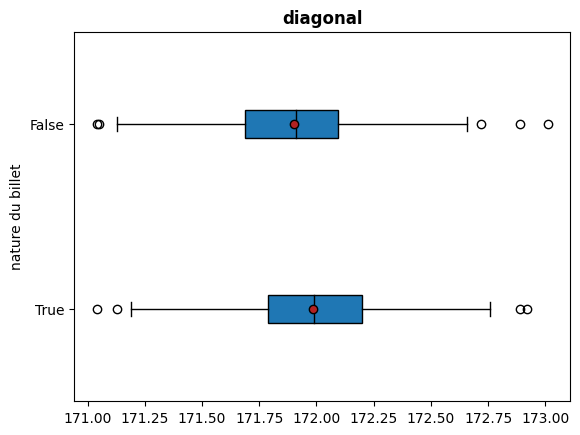

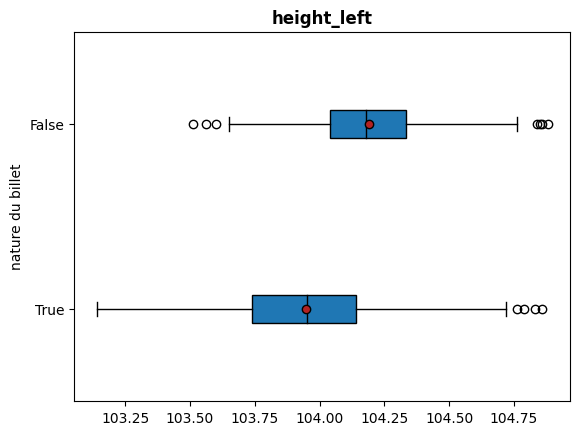

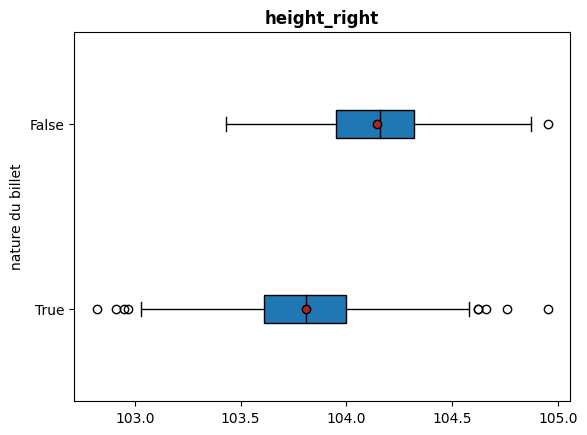

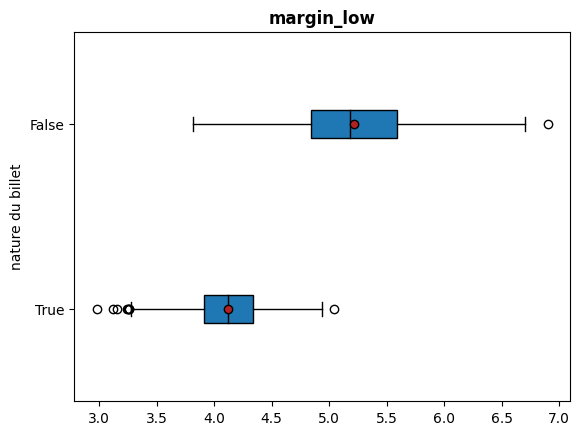

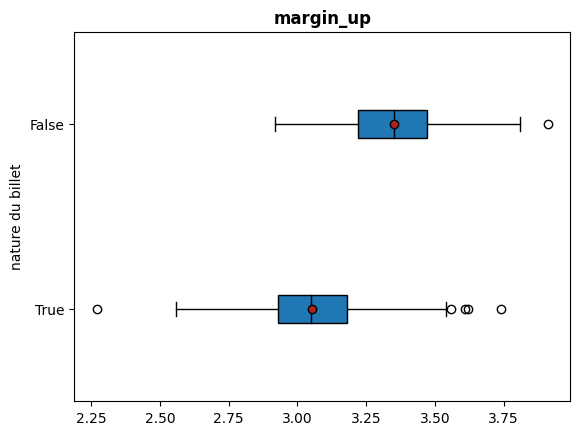

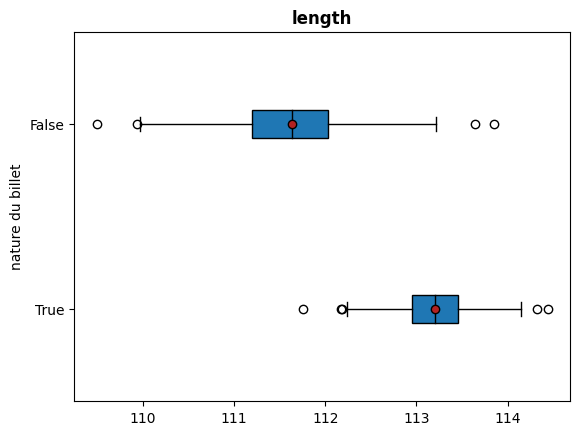

In [54]:
#caractériser des groupes 'True' et 'False'
#boxplot pour chaque variable et chaque cluster
modalites = df['is_genuine'].unique()

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

for a in df.columns[1:len(df.columns)]:
    groupes = []
    for m in modalites:
        groupes.append(df[df['is_genuine']==m][a])
    plt.boxplot(groupes, vert=False, labels=modalites, patch_artist=True, medianprops=medianprops, meanprops=meanprops, showmeans=True)
    plt.title(a, fontweight='bold')
    plt.ylabel('nature du billet')
    plt.show()

# **Etape 3 - Analyse des outliers**

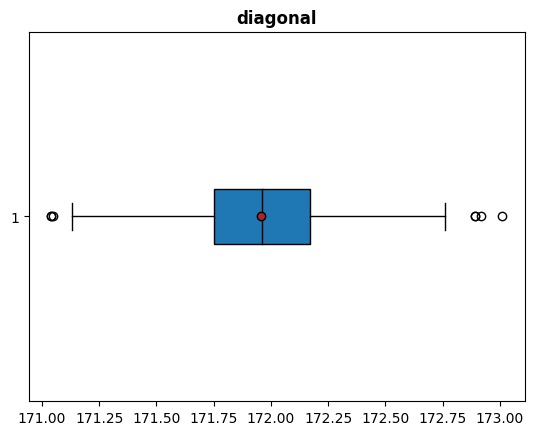

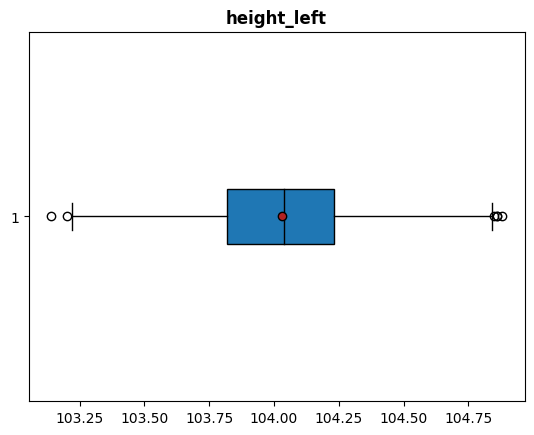

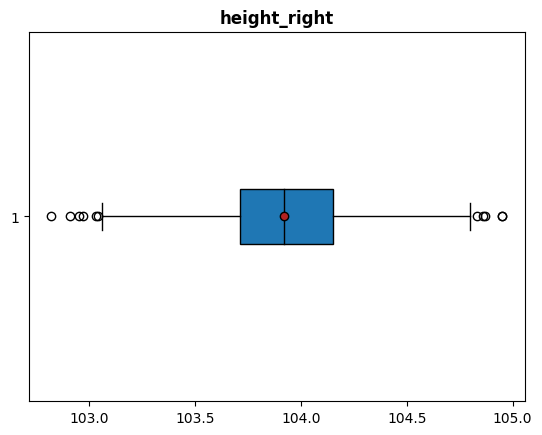

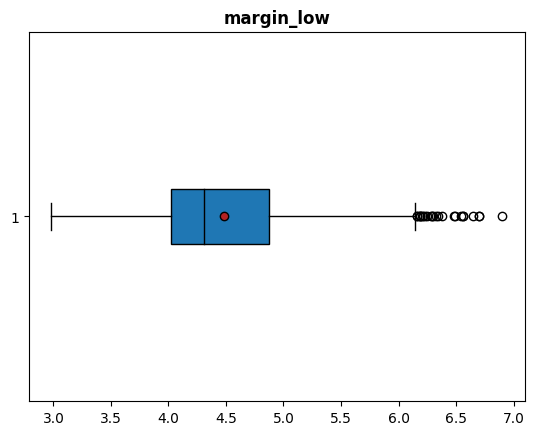

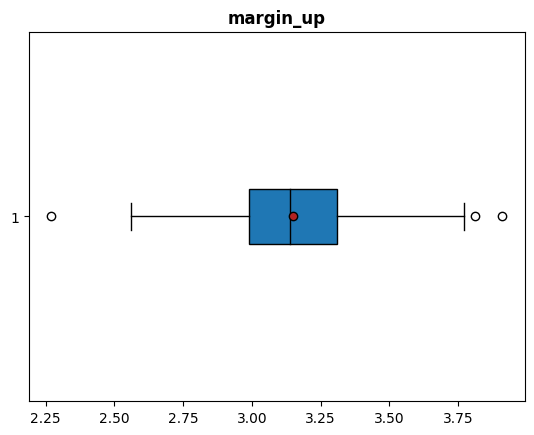

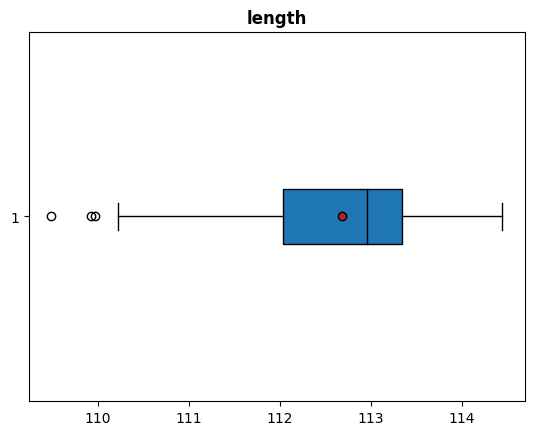

In [ ]:
#boxplot pour chaque variable
#peu d'outliers
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
for i in df.columns[1:]:
    plt.boxplot(df[i], vert=False, patch_artist=True, medianprops=medianprops, meanprops=meanprops, showmeans=True)
    plt.title(i, fontweight='bold')
    plt.show()

In [ ]:
#analyse par le z-score
from scipy.stats import zscore
df_z = df.iloc[:,1:].apply(zscore)

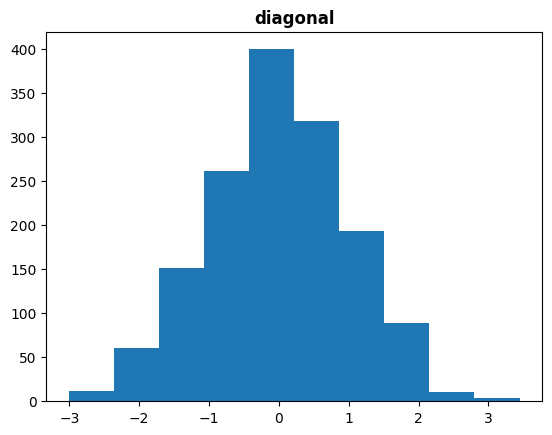

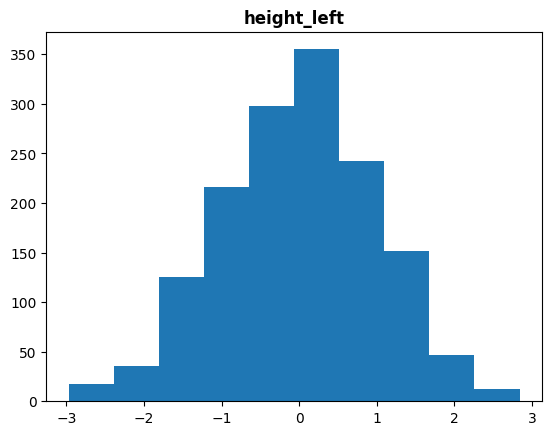

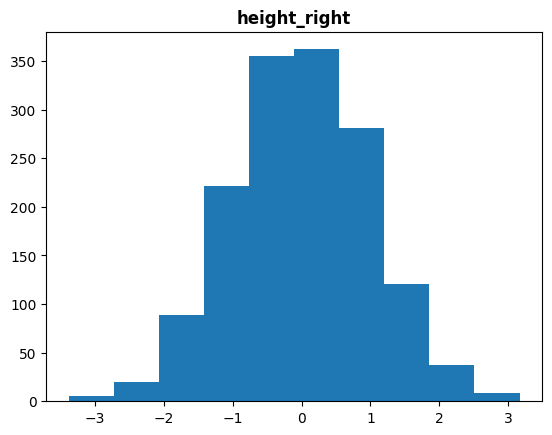

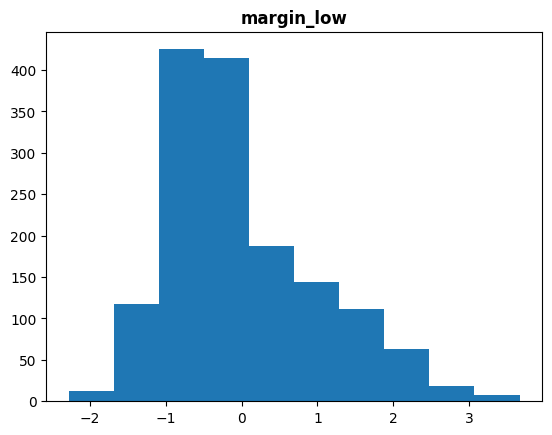

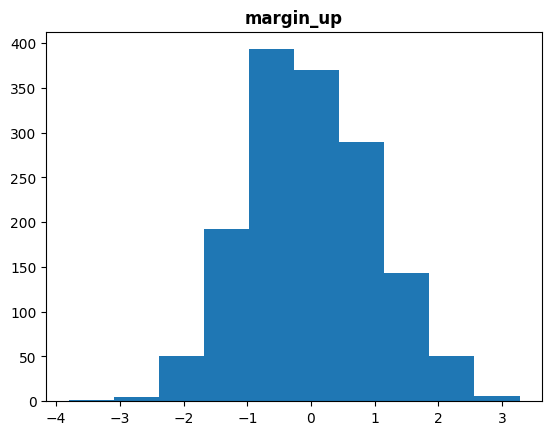

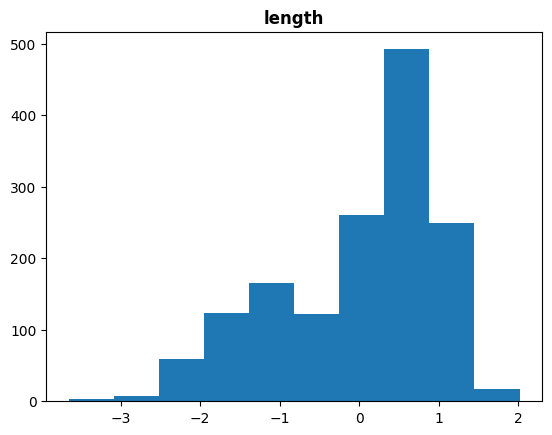

In [ ]:
#répartition des z_scores par variables
#très peu de données au-delà de 3 écarts-types
for i in df_z.columns:
    plt.hist(df_z[i])
    plt.title(i, fontweight='bold')
    plt.show()

# **Etape 4 - Partition en k-means**

## **1 - Préparation du modèle**

In [ ]:
#Chargeons les librairies graphiques
sns.set()

In [ ]:
#on enregistre tous les noms de variables
features = df.iloc[:,1:].columns

In [ ]:
#Enregistrons ce dataframe dans une variable temporaire tmp en supprimant la colonne is_genuine
tmp = df[features]

In [ ]:
#on instancie notre estimateur
kmeans = KMeans(n_clusters=3)

In [ ]:
#on l'entraine
kmeans.fit(tmp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
#on calcule l'inertie
kmeans.inertia_

861.415105758143

## **2 - Méthode du coude**

In [ ]:
#on définit le nombre de clusters que l'on veut tester
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
#Ensuite, pour chaque valeur de k, on entraine un k-means spécifique et on stocke son inertie :
intertia = []
for i in k_list :
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tmp)
    intertia.append(kmeans.inertia_)
intertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[2307.505186419591,
 972.1153638502309,
 861.5337403065263,
 774.7049036249068,
 711.1309410075414,
 666.7558663202233,
 632.0046705404043,
 596.5672752752016,
 572.7006964233434]

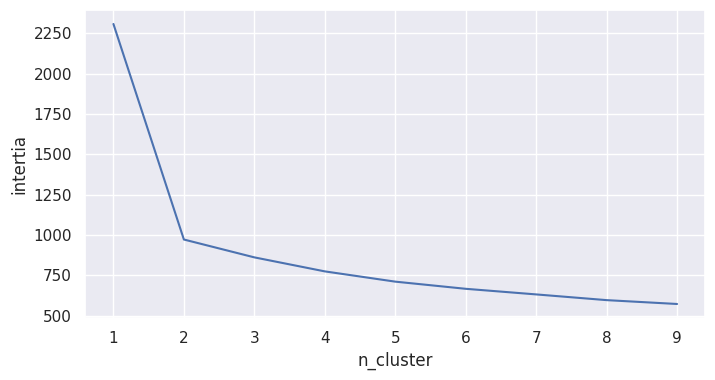

In [ ]:
#on affiche le résultat
#cassure nette à 2 clusters
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, intertia)

## **3 - Méthode du coefficient de silhouette**

In [ ]:
#Le coefficient de silhouette est compris entre -1 (mauvais) et 1 (excellent)
from sklearn.metrics import silhouette_score
k_list = range(2, 10)
silhouette = []
for i in k_list:
    k_means = KMeans(n_clusters=i, random_state = 808)
    k_means.fit(tmp)
    k_means_labels = k_means.predict(tmp)
    silhouette.append(silhouette_score(tmp,k_means_labels))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

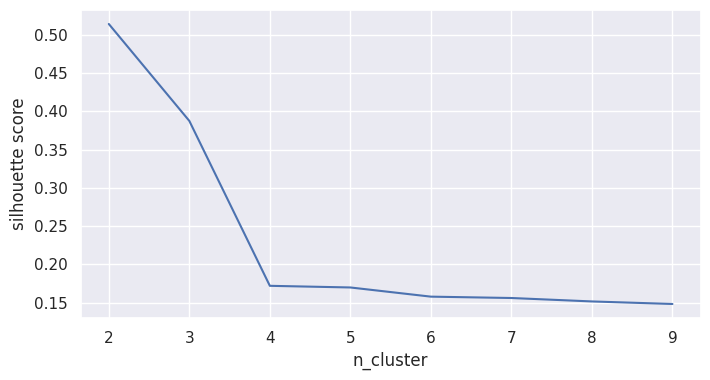

In [ ]:
#le silhouette score est le plus fort à 2 clusters
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.set_ylabel("silhouette score")
ax.set_xlabel("n_cluster")
ax = plt.plot(k_list, silhouette)

## **4 - Création des clusters**

In [ ]:
#Regardons maintenant les clusters que nous avons obtenus.
#Nous devons d'abord ré-entrainer un estimateur:
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(tmp)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
#voici les clusters
labels = kmeans.labels_
tmp["cluster"] = labels

In [ ]:
#afficher graphiquement :sns.pairplot(tmp, hue="cluster")
tmp

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,171.81,104.86,104.95,4.520000,2.89,112.83,0
1,171.46,103.36,103.66,3.770000,2.99,113.09,0
2,172.69,104.48,103.50,4.400000,2.94,113.16,0
3,171.36,103.91,103.94,3.620000,3.01,113.51,0
4,171.73,104.28,103.46,4.040000,3.48,112.54,0
...,...,...,...,...,...,...,...
1495,172.17,104.49,103.76,5.047570,2.93,111.21,1
1496,172.08,104.15,104.17,4.778967,3.40,112.29,1
1497,171.72,104.46,104.12,5.726993,3.61,110.31,1
1498,172.66,104.33,104.41,5.185862,3.56,111.47,1


## **5 - caractérisation des clusters**

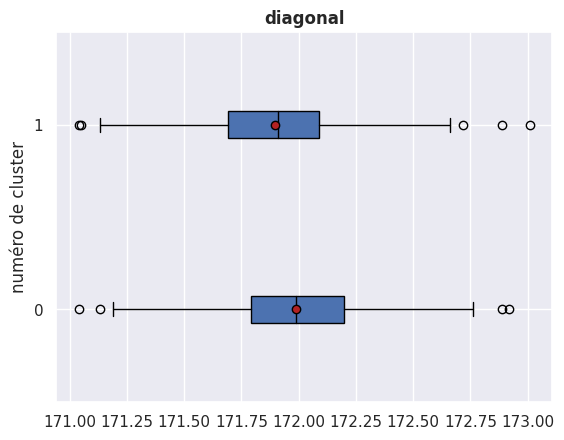

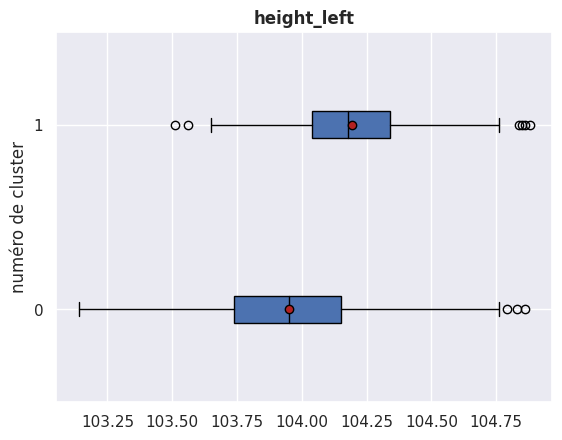

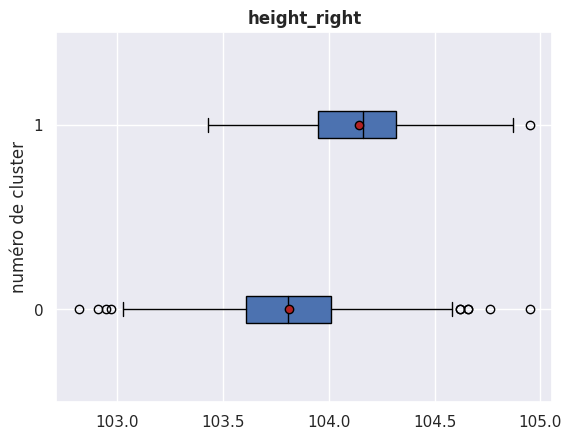

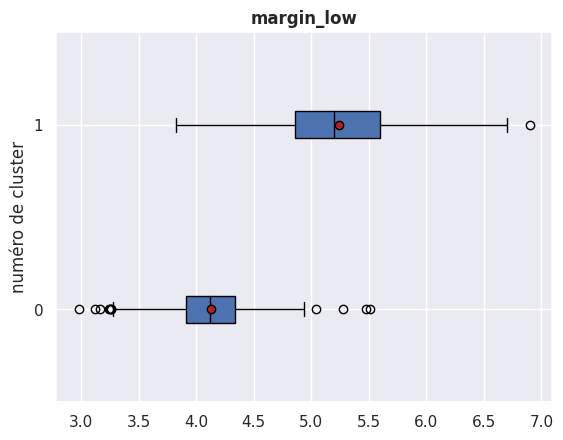

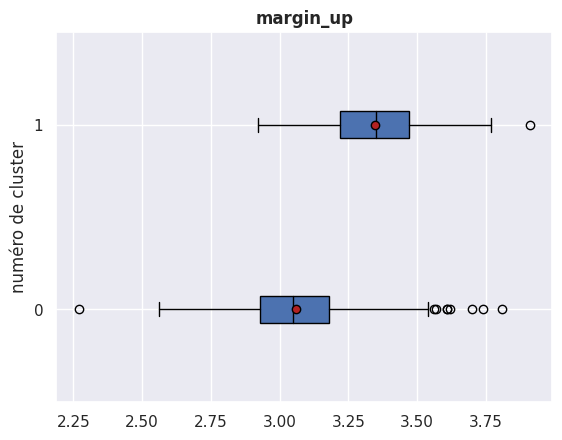

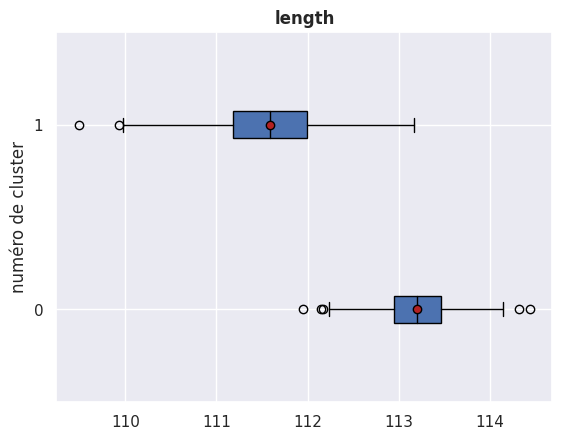

In [ ]:
#boxplot pour chaque variable et chaque cluster pour nous permettre de reconnaitre les clusters True et False (appelés 0 et 1 dans tmp)
modalites = tmp['cluster'].unique()

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

for a in tmp.columns[0:len(tmp.columns)-1]:
    groupes = []
    for m in modalites:
        groupes.append(tmp[tmp['cluster']==m][a])
    plt.boxplot(groupes, vert=False, labels=modalites, patch_artist=True, medianprops=medianprops, meanprops=meanprops, showmeans=True)
    plt.title(a, fontweight='bold')
    plt.ylabel('numéro de cluster')
    plt.show()

In [ ]:
#dataframe avec les centroides, source : https://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial8/tutorial8.html
sub_tmp = tmp.groupby('cluster').agg({i: 'mean' for i in tmp.columns})
sub_tmp = sub_tmp.drop('cluster', axis=1)
df_clusters_kmeans = sub_tmp.transpose().apply(pd.to_numeric).style.set_precision(1).background_gradient(axis=1)
df_clusters_kmeans

<ipython-input-210-a8cb3ebdf8a8>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_clusters_kmeans = sub_tmp.transpose().apply(pd.to_numeric).style.set_precision(1).background_gradient(axis=1)


cluster,0,1
diagonal,172.0,171.9
height_left,104.0,104.2
height_right,103.8,104.1
margin_low,4.1,5.2
margin_up,3.1,3.3
length,113.2,111.6


## **6 - vérification du caractère prédictif et confusion matrix**

In [ ]:
#longueur de chaque cluster
for i in tmp['cluster'].unique():
    print('La longueur du cluster {} est de {} billets.'.format(i, len(tmp[tmp['cluster']==i])))

La longueur du cluster 0 est de 1016 billets.
La longueur du cluster 1 est de 484 billets.


In [ ]:
#on met les clusters 1 et 0 par fréquence d'apparition décroissante pour les associer à True et False dans le df d'origine
cluster_counts = tmp['cluster'].value_counts()

In [ ]:
#on crée un df temporaire ou on remplace les valeurs True et False par leurs numéros de clusters respectifs
df_replace_is_genuine = df.replace(['True', 'False'], [cluster_counts.index[0], cluster_counts.index[1]])
#calcul accuracy score
from sklearn.metrics import accuracy_score
print('Le score de prédiction est de {} %'.format(round(accuracy_score(df_replace_is_genuine['is_genuine'].tolist(), tmp['cluster'].tolist())*100,3)))

Le score de prédiction est de 98.533 %


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(df_replace_is_genuine['is_genuine'].tolist(), tmp['cluster'].tolist())

array([[997,   3],
       [ 19, 481]])

In [ ]:
#precision et recall scores
#rappel = TP / (TP + FN)
#précision = TP / (TP + FP)
from sklearn.metrics import precision_score, recall_score
print("Precision:",round(precision_score(df_replace_is_genuine['is_genuine'].tolist(), tmp['cluster'].tolist()),4))
print("Recall:",round(recall_score(df_replace_is_genuine['is_genuine'].tolist(), tmp['cluster'].tolist()),4))

Precision: 0.9938
Recall: 0.962


## **7 - essai avec des données scalées**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Instancier le Scaler
scaler = MinMaxScaler()

# et l'appliquer
data_array = scaler.fit_transform(df[features])

# transformer le array en dataframe (c'est plus friendly)
df_scaled = pd.DataFrame(data_array,  columns = features)

# verifier que les min et max des variables sont tous 0 et 1
df_scaled.describe().loc[['min','max']]

,diagonal,height_left,height_right,margin_low,margin_up,length
min,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#on instancie notre estimateur
kmeans = KMeans(n_clusters=2)
#on l'entraine
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
#Regardons maintenant les clusters que nous avons obtenus.
#Nous devons d'abord ré-entrainer un estimateur:
n_clusters=2
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [ ]:
#voici les clusters
labels = kmeans.labels_
df_scaled["cluster"] = labels

In [ ]:
df_scaled

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,0.390863,0.988506,1.000000,0.392857,0.378049,0.674747,1
1,0.213198,0.126437,0.394366,0.201531,0.439024,0.727273,0
2,0.837563,0.770115,0.319249,0.362245,0.408537,0.741414,0
3,0.162437,0.442529,0.525822,0.163265,0.451220,0.812121,0
4,0.350254,0.655172,0.300469,0.270408,0.737805,0.616162,0
...,...,...,...,...,...,...,...
1495,0.573604,0.775862,0.441315,0.527441,0.402439,0.347475,1
1496,0.527919,0.580460,0.633803,0.458920,0.689024,0.565657,1
1497,0.345178,0.758621,0.610329,0.700764,0.817073,0.165657,1
1498,0.822335,0.683908,0.746479,0.562720,0.786585,0.400000,1


In [ ]:
#accuracy score
#on met les clusters 1 et 0 par fréquence d'apparition décroissante pour les associer à True et False dans le df d'origine
cluster_counts = df_scaled['cluster'].value_counts()
#on crée un df temporaire en remplaçant True et False par 0 et 1
df_replace_is_genuine = df.replace(['True', 'False'], [cluster_counts.index[0], cluster_counts.index[1]])
accuracy_kmeans = round(accuracy_score(df_replace_is_genuine['is_genuine'].tolist(), df_scaled['cluster'].tolist())*100,3)
print('Le score de prédiction est de {} %'.format(accuracy_kmeans))

Le score de prédiction est de 98.667 %


In [ ]:
#confusion matrix
#résultats meilleurs !
confusion_matrix_kmeans = confusion_matrix(df_replace_is_genuine['is_genuine'].tolist(), df_scaled['cluster'].tolist())
confusion_matrix_kmeans

array([[992,   8],
       [ 12, 488]])

In [ ]:
#precision et recall scores
#résultats meilleurs !
#rappel = TP / (TP + FN)
#précision = TP / (TP + FP)
recall_kmeans = round(recall_score(df_replace_is_genuine['is_genuine'].tolist(), df_scaled['cluster'].tolist())*100,3)
precision_kmeans = round(precision_score(df_replace_is_genuine['is_genuine'].tolist(), df_scaled['cluster'].tolist())*100,3)
print("Precision:", precision_kmeans)
print("Recall:", recall_kmeans)

Precision: 98.387
Recall: 97.6


# **Etape 5 - Régression logistique**

## **1 - Séparation entre train et split**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# split train, test
df = df.replace(['True', 'False'], [1, 0])
X = df[features]
y = df.is_genuine
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
# initialisation et entraînement en une ligne
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

<Axes: ylabel='Count'>

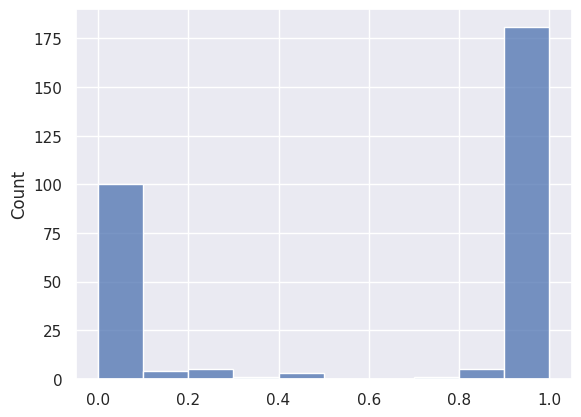

In [ ]:
#histogramme des probabilités des prédictions
y_hat_proba = clf.predict_proba(X_test)[:,1]
sns.histplot(y_hat_proba)

## **2 - vérification du caractère prédictif et confusion matrix**

In [ ]:
#accuracy score
# predictions
y_pred = clf.predict(X_test)
#à voir X train ?

print("accuracy",accuracy_score(y_test, y_pred))

accuracy 0.9866666666666667


In [ ]:
#confusion matrix
confusion_matrix(y_test, y_pred)

array([[110,   1],
       [  3, 186]])

In [ ]:
from sklearn.metrics import roc_auc_score
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("ROC-AUC", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

Precision: 0.9946524064171123
Recall: 0.9841269841269841
ROC-AUC 0.999618666285333


Text(0.5, 1.0, 'ROC curve')

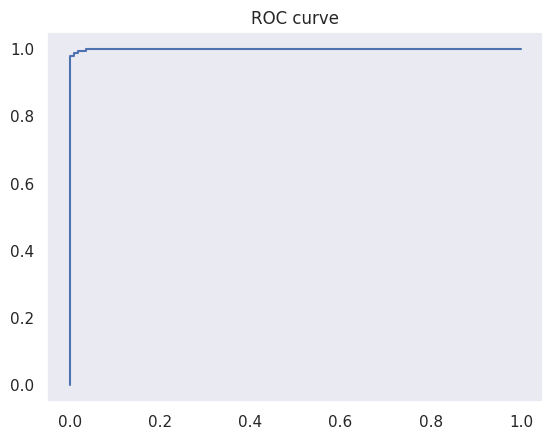

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.grid()
plt.title("ROC curve")

## **3 - amélioration du modèle (données scalées) (optionnel)**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Instancier le Scaler
scaler = MinMaxScaler()

# et l'appliquer
data_array = scaler.fit_transform(df[features])

# transformer le array en dataframe (c'est plus friendly)
df_scaled = pd.DataFrame(data_array,  columns = features)

# verifier que les min et max des variables sont tous 0 et 1
df_scaled.describe().loc[['min','max']]

,diagonal,height_left,height_right,margin_low,margin_up,length
min,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# initialisation et entraînement en une ligne
X = df_scaled[features]
y = df.is_genuine
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

<Axes: ylabel='Count'>

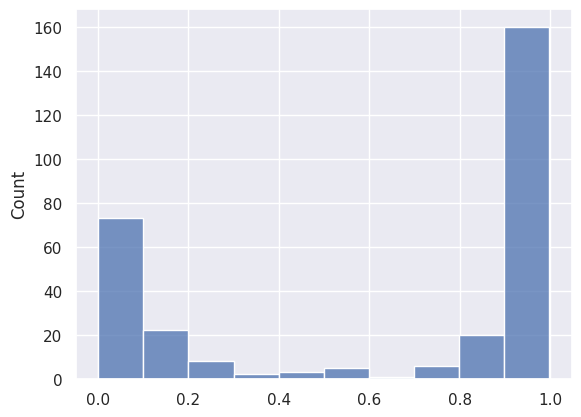

In [ ]:
#histogramme des probabilités des prédictions
y_hat_proba = clf.predict_proba(X_test)[:,1]
sns.histplot(y_hat_proba)

In [ ]:
#classification report
y_pred = clf.predict(X_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))
print('Le score de prédiction est de {} %'.format(round(accuracy_score(y_test, y_pred)*100,3)))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       111
           1       0.98      0.99      0.99       189

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300

Le score de prédiction est de 98.333 %


## **4 - tests avec différents niveaux de classification**

In [ ]:
# classes prédites pour les seuils 0.1, 0.2 [...] et 0.9
y_hat_proba = clf.predict_proba(X_test)[:,1]
for i in range(1,10,1):
    globals()['y_pred_%s' % i] = [0 if value < i/10 else 1 for value in y_hat_proba ]

In [ ]:
#affichage da la confusion matrix selon niveau de seuil
for i in range(1,10,1):
    print('confusion matrix à un seuil de {} :'.format(i/10))
    print(confusion_matrix(y_test, globals()['y_pred_%s' % i]))
    print("--------------")

confusion matrix à un seuil de 0.1 :
[[ 72  39]
 [  0 189]]
--------------
confusion matrix à un seuil de 0.2 :
[[ 95  16]
 [  0 189]]
--------------
confusion matrix à un seuil de 0.3 :
[[103   8]
 [  0 189]]
--------------
confusion matrix à un seuil de 0.4 :
[[104   7]
 [  1 188]]
--------------
confusion matrix à un seuil de 0.5 :
[[107   4]
 [  1 188]]
--------------
confusion matrix à un seuil de 0.6 :
[[110   1]
 [  3 186]]
--------------
confusion matrix à un seuil de 0.7 :
[[110   1]
 [  4 185]]
--------------
confusion matrix à un seuil de 0.8 :
[[111   0]
 [  9 180]]
--------------
confusion matrix à un seuil de 0.9 :
[[111   0]
 [ 30 159]]
--------------


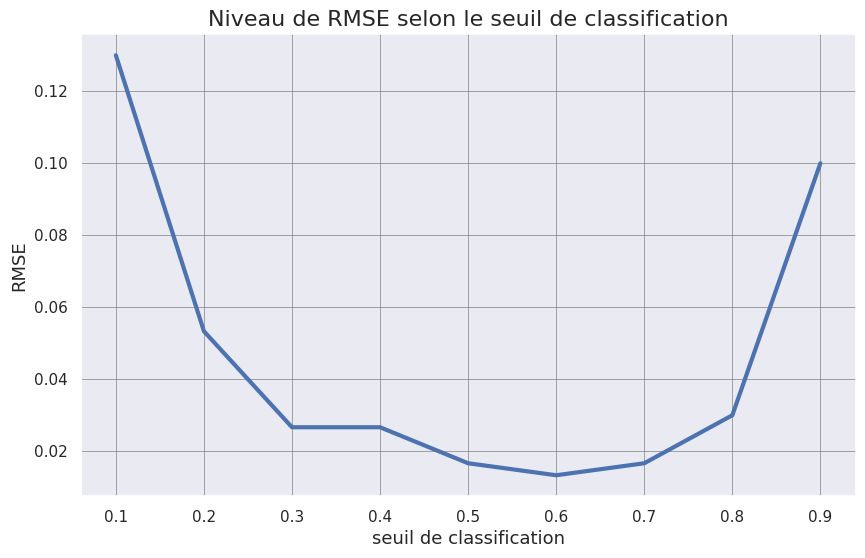

In [ ]:
# Affichage du RMSE selon le seuil de classification
#préparation des données pour les plots
y_1 = []
y_2 = []
seuils = [i/10 for i in range(1,10,1)]
for i in range(1,10,1):
    y_1.append(mean_squared_error(y_test, globals()['y_pred_%s' % i]))
    y_2.append(accuracy_score(y_test, globals()['y_pred_%s' % i]))

plt.figure(figsize=(10, 6))
plt.plot(seuils, y_1, label=i, linewidth=3)
plt.ylabel('RMSE', fontsize=13)
plt.xlabel('seuil de classification', fontsize=13)
plt.yticks(fontsize=11)
plt.title('Niveau de RMSE selon le seuil de classification', fontsize=16)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

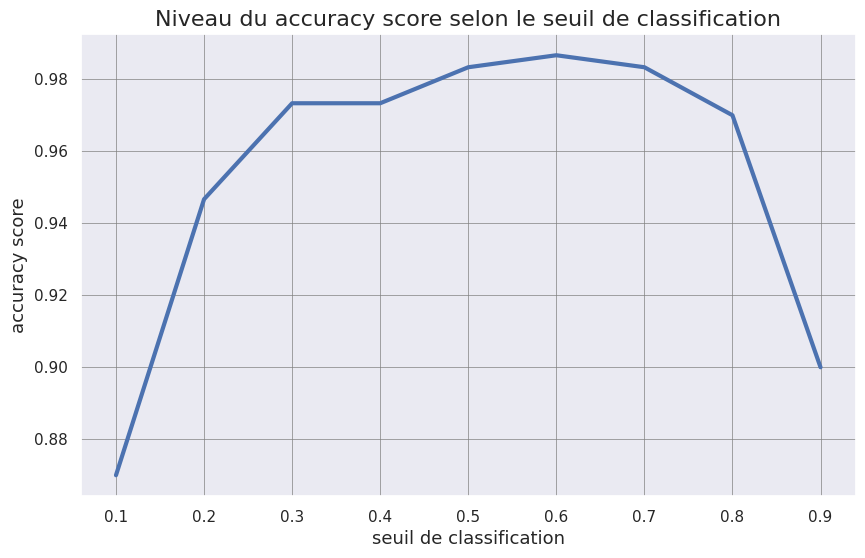

In [ ]:
# Affichage du accuracy score selon le seuil de classification
#conclusion : meilleurs scores à 0.6 avec les valeurs manquantes remplacées par régression linéaire
#conclusion : meilleurs scores à 0.4 et 0.5 avec lignes avec null éliminées
plt.figure(figsize=(10, 6))
plt.plot(seuils, y_2,label=i, linewidth=3)
plt.ylabel('accuracy score', fontsize=13)
plt.xlabel('seuil de classification', fontsize=13)
plt.yticks(fontsize=11)
plt.title('Niveau du accuracy score selon le seuil de classification', fontsize=16)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

## **5 - tests avec différents niveaux de test size**

In [ ]:
#conclusion : test size = 0.35 est le meilleur à seuil de classification = 0.6 (à random state et seuils de classifications égaux) avec la solution des Null remplacés par régression linéaire
#préparation des données pour les plots
y_rmse = []
y_acc = []
seuils = [i/100 for i in range(5,70,5)]
for i in range(5,70,5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=42)
    clf = LogisticRegression(random_state=42).fit(X_train, y_train)
    y_hat_proba = clf.predict_proba(X_test)[:,1]
    y_pred = [0 if value < 0.6 else 1 for value in y_hat_proba ]
    y_rmse.append(mean_squared_error(y_test, y_pred))
    y_acc.append(accuracy_score(y_test, y_pred))

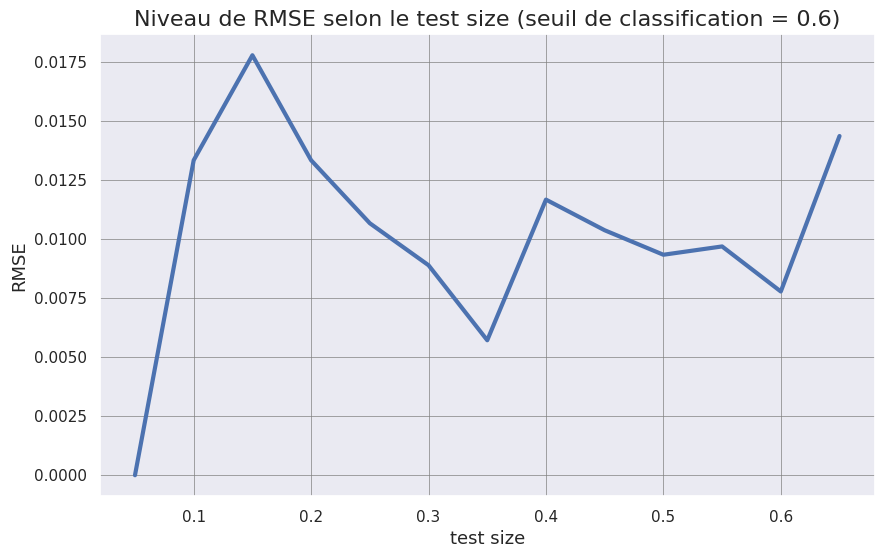

In [ ]:
# Affichage du RMSE selon le test size
plt.figure(figsize=(10, 6))
plt.plot(seuils, y_rmse, label=i, linewidth=3)
plt.ylabel('RMSE', fontsize=13)
plt.xlabel('test size', fontsize=13)
plt.yticks(fontsize=11)
plt.title('Niveau de RMSE selon le test size (seuil de classification = 0.6)', fontsize=16)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

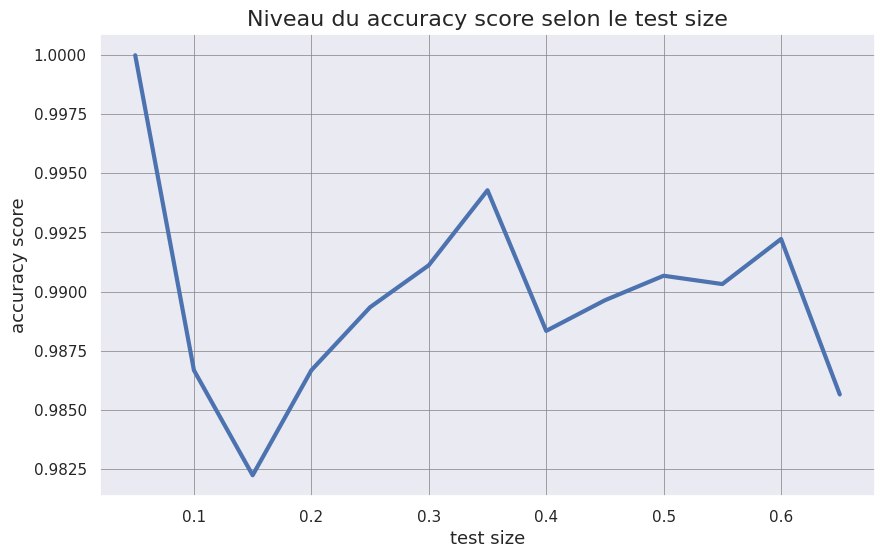

In [ ]:
# Affichage du accuracy score selon le test size
plt.figure(figsize=(10, 6))
plt.plot(seuils, y_acc, label=i, linewidth=3)
plt.ylabel('accuracy score', fontsize=13)
plt.xlabel('test size', fontsize=13)
plt.yticks(fontsize=11)
plt.title('Niveau du accuracy score selon le test size', fontsize=16)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
#test final avec seuil à 0.6 et test size à 0.35
#MEILLEUR SCORE A 99,33%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)
clf = LogisticRegression(random_state=42).fit(X_train, y_train)
y_hat_proba = clf.predict_proba(X_test)[:,1]
y_pred = [0 if value < 0.6 else 1 for value in y_hat_proba ]
confusion_matrix_log = confusion_matrix(y_test, y_pred)
accuracy_log = round(accuracy_score(y_test, y_pred)*100,3)
precision_log = round(precision_score(y_test, y_pred)*100,3)
recall_log = round(recall_score(y_test, y_pred)*100,3)
print(confusion_matrix_log)
print('---------')
print(classification_report(y_test, y_pred))
print('Le score de prédiction est de {} %'.format(accuracy_log))
print("Precision:", precision_log)
print("Recall:", recall_log)

[[189   1]
 [  2 333]]
---------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       190
           1       1.00      0.99      1.00       335

    accuracy                           0.99       525
   macro avg       0.99      0.99      0.99       525
weighted avg       0.99      0.99      0.99       525

Le score de prédiction est de 99.429 %
Precision: 99.701
Recall: 99.403


# **Etape 6 - random forest**

In [ ]:
#(OPTIONNEL : amélioration du modèle en scalant les données)
# Instancier le Scaler
scaler = MinMaxScaler()

# et l'appliquer
data_array = scaler.fit_transform(df[features])

# transformer le array en dataframe (c'est plus friendly)
df_scaled = pd.DataFrame(data_array,  columns = features)

# verifier que les min et max des variables sont tous 0 et 1
df_scaled.describe().loc[['min','max']]

,diagonal,height_left,height_right,margin_low,margin_up,length
min,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#split train, test
#remplacer dans X df_scaled par df ou l'inverse si on utilise pas le scalage des données
X = df[features]
y = df.is_genuine
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
#entrainement du modèle en faisant varier le nombre d'arbres
from sklearn.ensemble import RandomForestClassifier
tree_counts = [1,2,3,4,5,10,15,20,25,30,40,50, 60, 70, 80, 90, 100, 110, 120]

accuracy  = []
for n_estimator in tree_counts:
    clf = RandomForestClassifier(
        n_estimators = n_estimator,
        max_depth = 2,
        random_state = 8
        )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    print('confusion matrix avec un nombre d arbre de {}:'.format(n_estimator))
    print(confusion_matrix(y_test, y_pred))
    print("Precision:",round(precision_score(y_test, y_pred),4))
    print("Recall:",round(recall_score(y_test, y_pred),4))
    print("--------------")

confusion matrix avec un nombre d arbre de 1:
[[102   9]
 [  1 188]]
Precision: 0.9543
Recall: 0.9947
--------------
confusion matrix avec un nombre d arbre de 2:
[[103   8]
 [  1 188]]
Precision: 0.9592
Recall: 0.9947
--------------
confusion matrix avec un nombre d arbre de 3:
[[107   4]
 [  1 188]]
Precision: 0.9792
Recall: 0.9947
--------------
confusion matrix avec un nombre d arbre de 4:
[[108   3]
 [  1 188]]
Precision: 0.9843
Recall: 0.9947
--------------
confusion matrix avec un nombre d arbre de 5:
[[105   6]
 [  1 188]]
Precision: 0.9691
Recall: 0.9947
--------------
confusion matrix avec un nombre d arbre de 10:
[[103   8]
 [  1 188]]
Precision: 0.9592
Recall: 0.9947
--------------
confusion matrix avec un nombre d arbre de 15:
[[106   5]
 [  1 188]]
Precision: 0.9741
Recall: 0.9947
--------------
confusion matrix avec un nombre d arbre de 20:
[[108   3]
 [  1 188]]
Precision: 0.9843
Recall: 0.9947
--------------
confusion matrix avec un nombre d arbre de 25:
[[108   3]
 [ 

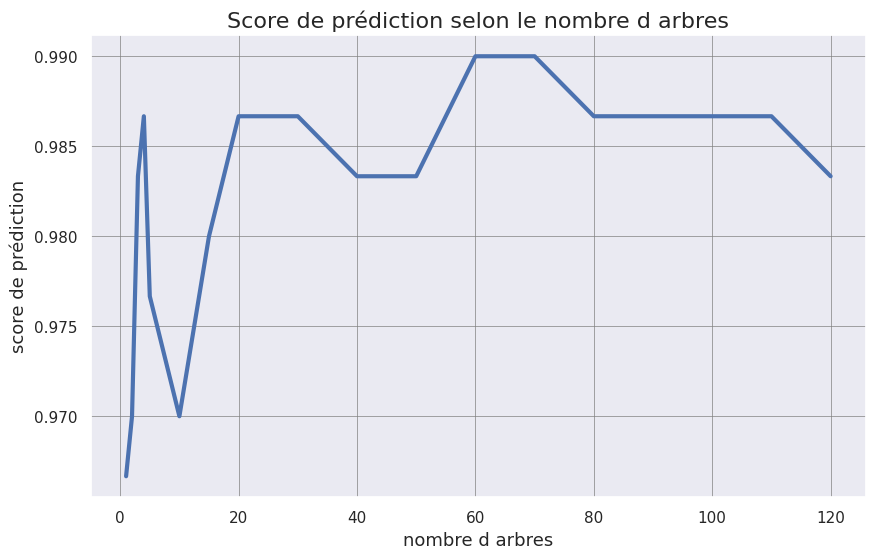

In [ ]:
# Affichage du score de prédiction selon le nombre d'arbres
#plateau à 0.99 dès 60 arbres
plt.figure(figsize=(10, 6))
plt.plot(tree_counts, accuracy, label=i, linewidth=3)
plt.ylabel('score de prédiction', fontsize=13)
plt.xlabel('nombre d arbres', fontsize=13)
plt.yticks(fontsize=11)
plt.title('Score de prédiction selon le nombre d arbres', fontsize=16)
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.show()

In [ ]:
#entrainement final avec nombre d'arbres = 60
clf = RandomForestClassifier(
    n_estimators = 60,
    max_depth = 2,
    random_state = 8
    )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_random_forest = round(accuracy_score(y_test, y_pred)*100,3)
confusion_matrix_random_forest = confusion_matrix(y_test, y_pred)
precision_random_forest = round(precision_score(y_test, y_pred)*100,3)
recall_random_forest = round(recall_score(y_test, y_pred)*100,3)
print('confusion matrix avec un nombre d arbre de 60 :')
print(confusion_matrix_random_forest)
print("Precision:", precision_random_forest)
print("Recall:", recall_random_forest)
print("Accuracy score:", accuracy_random_forest)
print("--------------")

confusion matrix avec un nombre d arbre de 60 :
[[109   2]
 [  1 188]]
Precision: 98.947
Recall: 99.471
Accuracy score: 99.0
--------------


In [ ]:
#grâce au modèle, on peut également ordonner l'importance de chaque variable prédictive
clf = RandomForestClassifier(
    n_estimators = 100,
    random_state = 8
    )

clf.fit(X_train, y_train)

importance_feature = clf.feature_importances_
importance_feature

array([0.00822959, 0.02704244, 0.04353059, 0.3321655 , 0.09360713,
       0.49542475])

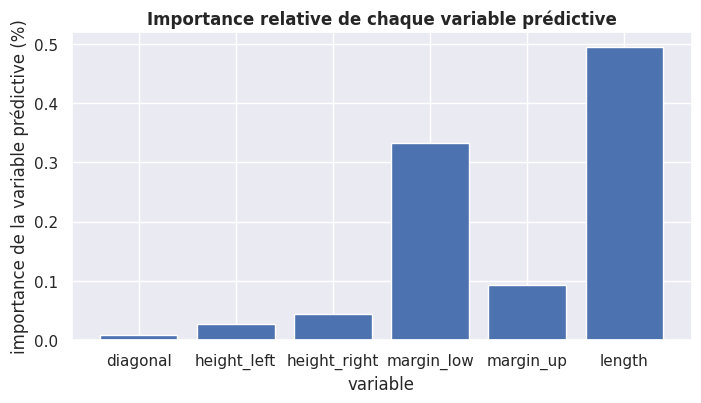

In [ ]:
#affichage
fig, ax = plt.subplots(1,1,figsize=(8,4))

ax.set_title('Importance relative de chaque variable prédictive', fontweight = 'bold')
ax.set_ylabel("importance de la variable prédictive (%)")
ax.set_xlabel("variable")
ax = plt.bar(features, importance_feature)

# **Etape 7 - KNN**

In [ ]:
#source : https://realpython.com/knn-python/
#(OPTIONNEL : amélioration du modèle en scalant les données)
# Instancier le Scaler
scaler = MinMaxScaler()

# et l'appliquer
data_array = scaler.fit_transform(df[features])

# transformer le array en dataframe (c'est plus friendly)
df_scaled = pd.DataFrame(data_array, columns = features)

# verifier que les min et max des variables sont tous 0 et 1
df_scaled.describe().loc[['min','max']]

,diagonal,height_left,height_right,margin_low,margin_up,length
min,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
#création de X et y et train, split
#remplacer df_scaled par df ou l'inverse si on utilise pas le scalage des données
X = df[features].values
y = df['is_genuine'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

In [ ]:
#recherche du nombre idéal de neighbors
#nombre idéal = 13
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
n_neighbors = gridsearch.best_params_['n_neighbors']
n_neighbors

13

In [ ]:
#on fit le modèle
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
#calcul du RMSE, du score, etc.
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
rmse_test = sqrt(mse)
accuracy_KNN = round(accuracy_score(y_test, y_pred)*100,3)
confusion_matrix_KNN = confusion_matrix(y_test, y_pred)
precision_KNN = round(precision_score(y_test, y_pred)*100,3)
recall_KNN = round(recall_score(y_test, y_pred)*100,3)
print('Le RMSE du test est de {}'.format(round(rmse_test,3)))
print('Le score de prédiction est de {} %'.format(accuracy_KNN))
print(confusion_matrix_KNN)
print('---------')
print(classification_report(y_test, y_pred))
print("Precision:", precision_KNN)
print("Recall:", recall_KNN)

Le RMSE du test est de 0.0
Le score de prédiction est de 100.0 %
[[ 90   0]
 [  0 210]]
---------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      1.00      1.00       210

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Precision: 100.0
Recall: 100.0


# **Etape 8 - choix du meilleur modèle**

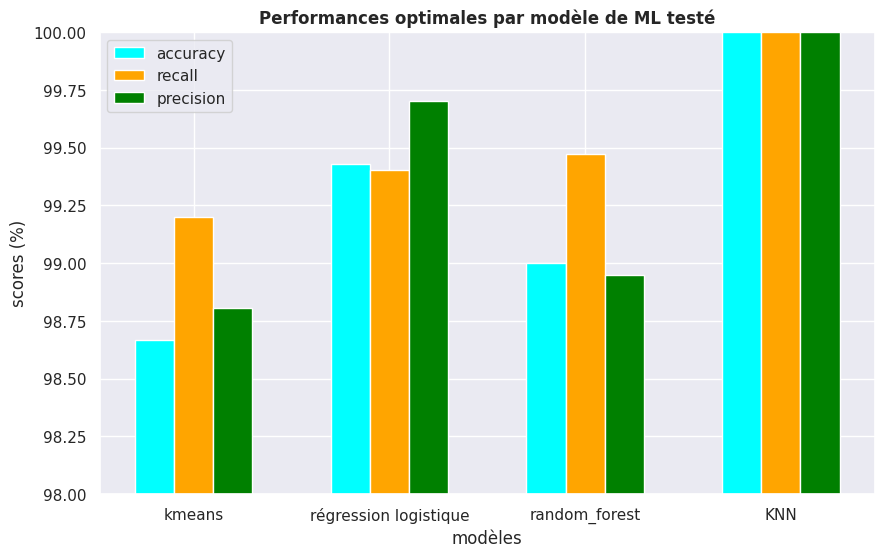

In [ ]:
#création du grouped bar plot pour montrer les performances par modèle
confusion_matrix = [confusion_matrix_kmeans, confusion_matrix_log, confusion_matrix_random_forest, confusion_matrix_KNN]

# create data
x = np.arange(4)
accuracy = [accuracy_kmeans, accuracy_log, accuracy_random_forest, accuracy_KNN]
recall = [recall_kmeans, recall_log, recall_random_forest, recall_KNN]
precision = [precision_kmeans, precision_log, precision_random_forest, precision_KNN]
width = 0.2

# plot data in grouped manner of bar type
plt.figure(figsize=(10, 6))
plt.bar(x-0.2, accuracy, width, color='cyan')
plt.bar(x, recall, width, color='orange')
plt.bar(x+0.2, precision, width, color='green')
plt.xticks(x, ['kmeans', 'régression logistique', 'random_forest', 'KNN'])
plt.xlabel("modèles")
plt.ylabel("scores (%)")
plt.title("Performances optimales par modèle de ML testé", fontweight = 'bold')
plt.legend(["accuracy", "recall", "precision"])
plt.ylim(98, 100)
plt.show()

kmeans


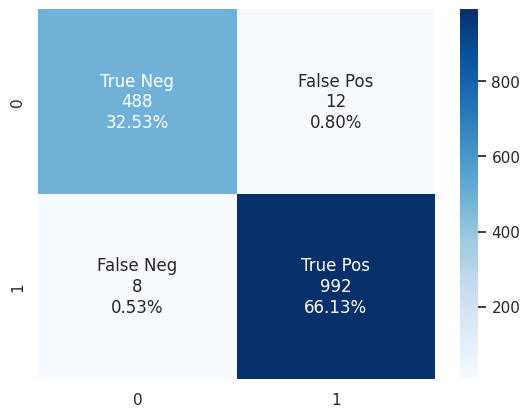

---------------------
logistique


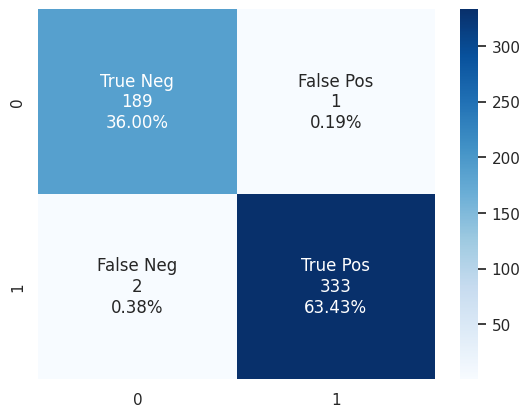

---------------------
random forest


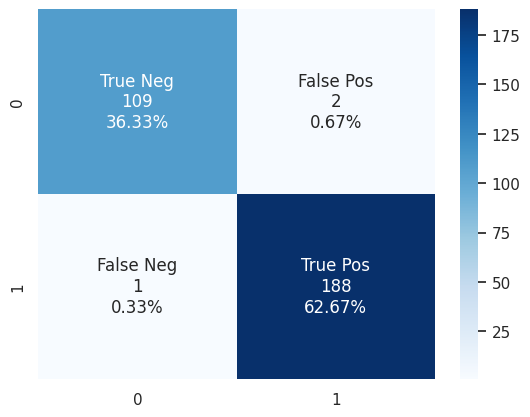

---------------------
knn


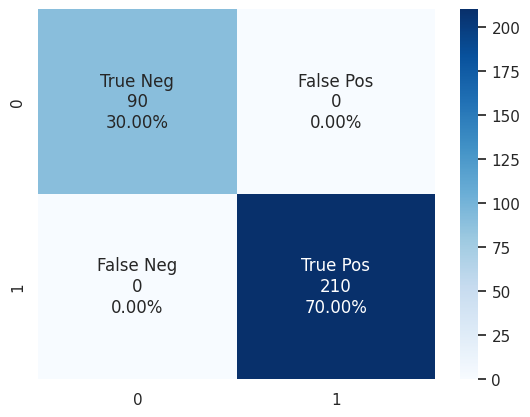

---------------------


In [ ]:
#affichage de la confusion matrix par modèle
#source: https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
modeles = ['kmeans', 'logistique', 'random forest', 'knn']
for i in range(4):
    print(modeles[i])
    plt.figure()
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix[i].flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix[i].flatten()/np.sum(confusion_matrix[i])]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix[i], annot=labels, fmt='', cmap='Blues')
    plt.show()
    print('---------------------')

# **Etape 9 - Export du fichier final**

In [ ]:
#Mettre le dataset data sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes
df.to_excel('data.xlsx', index=False)